In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

%matplotlib inline

In [2]:
#reading in all csvs created from NHL stats for all players notebook
stats2011_12 = pd.read_csv('../Data/2011_2012_stats.csv')
stats2012_13 = pd.read_csv('../Data/2012_2013_stats.csv')
stats2013_14 = pd.read_csv('../Data/2013_2014_stats.csv')
stats2014_15 = pd.read_csv('../Data/2014_2015_stats.csv')
stats2015_16 = pd.read_csv('../Data/2015_2016_stats.csv')
stats2016_17 = pd.read_csv('../Data/2016_2017_stats.csv')
stats2017_18 = pd.read_csv('../Data/2017_2018_stats.csv')
stats2018_19 = pd.read_csv('../Data/2018_2019_stats.csv')
stats2019_20 = pd.read_csv('../Data/2019_2020_stats.csv')
stats2020_21 = pd.read_csv('../Data/2020_2021_stats.csv')


In [3]:
#concating all dataframes on top of eachother to create all_dfs dataframe
all_dfs= pd.concat([stats2011_12,
                    stats2012_13,
                    stats2013_14,
                    stats2014_15,
                    stats2015_16,
                    stats2016_17,
                    stats2017_18,
                    stats2018_19,
                    stats2019_20,
                    stats2020_21]).reset_index(drop=True)
all_dfs

,id,name,position,team,assists,games,games_started,goals,time_on_ice,blocked,penaltymin,plusMinus,wins,losses,gaa,shots_against,goals_against,shutouts,yearid
0,8460465,Petr Sykora,Forward,New Jersey Devils,23.0,82.0,0.0,21.0,15:54,16.0,40.0,4.0,0.0,0.0,0.0000,0.0,0.0,0.0,2011-2012
1,8460542,Patrik Elias,Forward,New Jersey Devils,52.0,81.0,0.0,26.0,19:51,26.0,16.0,-8.0,0.0,0.0,0.0000,0.0,0.0,0.0,2011-2012
2,8460626,Bryce Salvador,Defenseman,New Jersey Devils,9.0,82.0,0.0,0.0,20:12,107.0,66.0,18.0,0.0,0.0,0.0000,0.0,0.0,0.0,2011-2012
3,8460720,Eric Boulton,Forward,New Jersey Devils,0.0,51.0,0.0,0.0,6:35,10.0,115.0,-12.0,0.0,0.0,0.0000,0.0,0.0,0.0,2011-2012
4,8464977,Dainius Zubrus,Forward,New Jersey Devils,27.0,82.0,0.0,17.0,18:41,41.0,34.0,7.0,0.0,0.0,0.0000,0.0,0.0,0.0,2011-2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10550,8481522,Peyton Krebs,Forward,Vegas Golden Knights,1.0,4.0,0.0,0.0,11:26,1.0,0.0,1.0,0.0,0.0,0.0000,0.0,0.0,0.0,2020-2021
10551,8470594,Marc-Andre Fleury,Goalie,Vegas Golden Knights,0.0,36.0,36.0,0.0,59:37:00,0.0,0.0,0.0,26.0,10.0,1.9845,989.0,71.0,6.0,2020-2021
10552,8475215,Robin Lehner,Goalie,Vegas Golden Knights,0.0,19.0,19.0,0.0,60:48:00,0.0,0.0,0.0,13.0,4.0,2.2851,505.0,44.0,1.0,2020-2021
10553,8476861,Oscar Dansk,Goalie,Vegas Golden Knights,0.0,1.0,1.0,0.0,61:25:00,0.0,0.0,0.0,1.0,0.0,3.9077,29.0,4.0,0.0,2020-2021


In [4]:
all_dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10555 entries, 0 to 10554
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10555 non-null  int64  
 1   name           10555 non-null  object 
 2   position       10555 non-null  object 
 3   team           10555 non-null  object 
 4   assists        10551 non-null  float64
 5   games          10551 non-null  float64
 6   games_started  10551 non-null  float64
 7   goals          10551 non-null  float64
 8   time_on_ice    10551 non-null  object 
 9   blocked        10551 non-null  float64
 10  penaltymin     10551 non-null  float64
 11  plusMinus      10551 non-null  float64
 12  wins           10551 non-null  float64
 13  losses         10551 non-null  float64
 14  gaa            10551 non-null  float64
 15  shots_against  10551 non-null  float64
 16  goals_against  10551 non-null  float64
 17  shutouts       10551 non-null  float64
 18  yearid

In [5]:
all_dfs['time_on_ice']


0           15:54
1           19:51
2           20:12
3            6:35
4           18:41
           ...   
10550       11:26
10551    59:37:00
10552    60:48:00
10553    61:25:00
10554        8:15
Name: time_on_ice, Length: 10555, dtype: object

In [6]:
new = all_dfs['time_on_ice'].str.split(":", n = 2, expand = True)
# making separate minute column from new data frame
all_dfs['minutes']= new[0]
# making separate seconds column from new data frame
all_dfs['seconds']= new[1]
# Dropping old time_on_ice column
all_dfs.drop(columns =['time_on_ice'], inplace = True)
# add back time on ice column in minute format as a float for aggregations
all_dfs['time_on_ice'] = all_dfs['minutes'].astype(float) + (all_dfs['seconds'].astype(float) / 60)
# Dropping minutes and seconds columns
all_dfs.drop(columns =['minutes'], inplace = True)
all_dfs.drop(columns =['seconds'], inplace = True)

In [7]:
all_dfs

,id,name,position,team,assists,games,games_started,goals,blocked,penaltymin,plusMinus,wins,losses,gaa,shots_against,goals_against,shutouts,yearid,time_on_ice
0,8460465,Petr Sykora,Forward,New Jersey Devils,23.0,82.0,0.0,21.0,16.0,40.0,4.0,0.0,0.0,0.0000,0.0,0.0,0.0,2011-2012,15.900000
1,8460542,Patrik Elias,Forward,New Jersey Devils,52.0,81.0,0.0,26.0,26.0,16.0,-8.0,0.0,0.0,0.0000,0.0,0.0,0.0,2011-2012,19.850000
2,8460626,Bryce Salvador,Defenseman,New Jersey Devils,9.0,82.0,0.0,0.0,107.0,66.0,18.0,0.0,0.0,0.0000,0.0,0.0,0.0,2011-2012,20.200000
3,8460720,Eric Boulton,Forward,New Jersey Devils,0.0,51.0,0.0,0.0,10.0,115.0,-12.0,0.0,0.0,0.0000,0.0,0.0,0.0,2011-2012,6.583333
4,8464977,Dainius Zubrus,Forward,New Jersey Devils,27.0,82.0,0.0,17.0,41.0,34.0,7.0,0.0,0.0,0.0000,0.0,0.0,0.0,2011-2012,18.683333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10550,8481522,Peyton Krebs,Forward,Vegas Golden Knights,1.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0000,0.0,0.0,0.0,2020-2021,11.433333
10551,8470594,Marc-Andre Fleury,Goalie,Vegas Golden Knights,0.0,36.0,36.0,0.0,0.0,0.0,0.0,26.0,10.0,1.9845,989.0,71.0,6.0,2020-2021,59.616667
10552,8475215,Robin Lehner,Goalie,Vegas Golden Knights,0.0,19.0,19.0,0.0,0.0,0.0,0.0,13.0,4.0,2.2851,505.0,44.0,1.0,2020-2021,60.800000
10553,8476861,Oscar Dansk,Goalie,Vegas Golden Knights,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.9077,29.0,4.0,0.0,2020-2021,61.416667


In [8]:
#adding points column
all_dfs['points'] = all_dfs['goals'] + all_dfs['assists']

In [9]:
#adding saves column
all_dfs['saves'] = all_dfs['shots_against'] - all_dfs['goals_against']

In [10]:
#adding save_percentage column
all_dfs['save_percentage'] = all_dfs['saves']/all_dfs['shots_against']

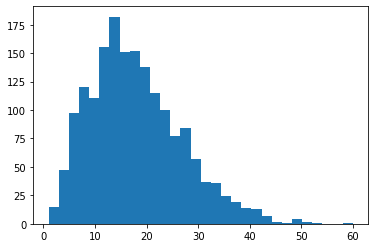

In [11]:
true_scoring = all_dfs[all_dfs['games']>70]
fwd_scoring= true_scoring[true_scoring['position']=='Forward']
def_scoring = true_scoring[true_scoring['position']=='Defenseman']
plt.hist(fwd_scoring['goals'],bins=30);

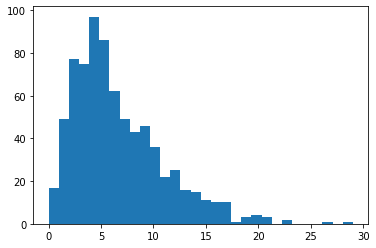

In [12]:
plt.hist(def_scoring['goals'],bins=30);

In [13]:
#creating function function to assign a value for score_rating
def score_rating(row):
    if row['goals'] <= 7:
        val = 3
    elif row['goals'] <= 12:
        val = 4
    elif row['goals'] <= 17 :
        val = 5
    elif row['goals'] <= 22 :
        val = 6
    elif row['goals'] <= 27 :
        val = 7
    elif row['goals'] <= 32:
        val = 8
    elif row['goals'] <= 37:
        val = 9
    elif row['goals'] >=38:
        val = 10
    else:
        val = 0
    return val
#adding a column with the values returned in the above function        
all_dfs['fwd_scoring_rtg'] = all_dfs[all_dfs['position']=='Forward'].apply(score_rating, axis=1)


In [14]:
def score_rating(row):
    if row['goals'] <= 3:
        val = 3
    elif row['goals'] <= 6:
        val = 4
    elif row['goals'] <= 9 :
        val = 5
    elif row['goals'] <= 12 :
        val = 6
    elif row['goals'] <= 15 :
        val = 7
    elif row['goals'] <= 18:
        val = 8
    elif row['goals'] <= 21:
        val = 9
    elif row['goals'] >=22:
        val = 10
    else:
        val = 0
    return val
all_dfs['def_scoring_rtg'] = all_dfs[all_dfs['position']=='Defenseman'].apply(score_rating, axis=1)

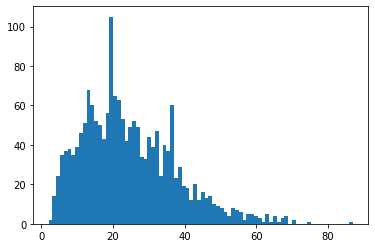

In [15]:
true_passing= all_dfs[all_dfs['games']>70]
fwd_passing = true_passing[true_passing['position']=='Forward']
def_passing = true_passing[true_passing['position']=='Defenseman']
plt.hist(fwd_passing['assists'],bins=80);

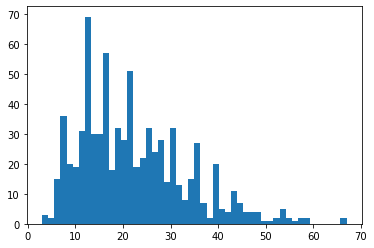

In [16]:
plt.hist(def_passing['assists'],bins=50);

In [17]:
def pass_rating(row):
    if row['assists'] <= 10:
        val = 3
    elif row['assists'] <= 15:
        val = 4
    elif row['assists'] <= 20 :
        val = 5
    elif row['assists'] <= 25 :
        val = 6
    elif row['assists'] <= 30 :
        val = 7
    elif row['assists'] <= 35:
        val = 8
    elif row['assists'] <= 40:
        val = 9
    elif row['assists'] >=41:
        val = 10
    else:
        val = 0
    return val
all_dfs['fwd_pass_rtg'] = all_dfs[all_dfs['position']=='Forward'].apply(pass_rating, axis=1)



In [18]:
def pass_rating(row):
    if row['assists'] <= 4:
        val = 3
    elif row['assists'] <= 9:
        val = 4
    elif row['assists'] <= 19 :
        val = 5
    elif row['assists'] <= 29 :
        val = 6
    elif row['assists'] <= 39 :
        val = 7
    elif row['assists'] <= 44:
        val = 8
    elif row['assists'] <= 49:
        val = 9
    elif row['assists'] >=50:
        val = 10
    else:
        val = 2
    return val
all_dfs['def_pass_rtg'] = all_dfs[all_dfs['position']=='Defenseman'].apply(pass_rating, axis=1)

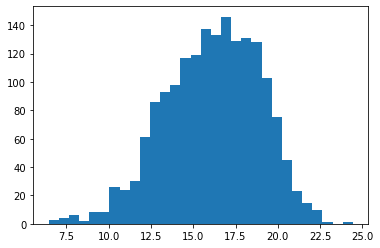

In [19]:
true_shift= all_dfs[all_dfs['games']>70]
fwd_shift = true_shift[true_shift['position']=='Forward']
def_shift = true_shift[true_shift['position']=='Defenseman']
plt.hist(fwd_shift['time_on_ice'],bins=30);


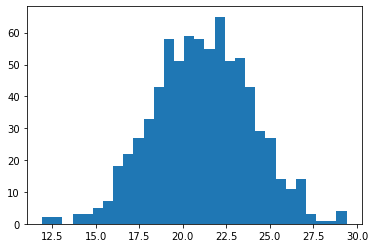

In [20]:
plt.hist(def_shift['time_on_ice'],bins=30);

In [21]:
def fwd_shift_usage_rating(row):
    if row['time_on_ice'] <= 6:
        val = 3
    elif row['time_on_ice'] <= 8:
        val = 4
    elif row['time_on_ice'] <= 10 :
        val = 5
    elif row['time_on_ice'] <= 12 :
        val = 6
    elif row['time_on_ice'] <= 14 :
        val = 7
    elif row['time_on_ice'] <= 16:
        val = 8
    elif row['time_on_ice'] <= 18:
        val = 9
    elif row['time_on_ice'] >=18.001:
        val = 10
    else:
        val = 0
    return val

In [22]:
def def_shift_usage_rating(row):
    if row['time_on_ice'] <= 15:
        val = 3
    elif row['time_on_ice'] <= 17.5:
        val = 4
    elif row['time_on_ice'] <= 19 :
        val = 5
    elif row['time_on_ice'] <= 20.5 :
        val = 6
    elif row['time_on_ice'] <= 22 :
        val = 7
    elif row['time_on_ice'] <= 23.5:
        val = 8
    elif row['time_on_ice'] <= 25:
        val = 9
    elif row['time_on_ice'] >=25.001:
        val = 10
    else:
        val = 0
    return val

In [23]:
all_dfs['fwd_shift_usage_rtg'] = all_dfs[all_dfs['position']=='Forward'].apply(fwd_shift_usage_rating, axis=1)
all_dfs['def_shift_usage_rtg'] = all_dfs[all_dfs['position']=='Defenseman'].apply(def_shift_usage_rating, axis=1)
all_dfs

,id,name,position,team,assists,games,games_started,goals,blocked,penaltymin,...,time_on_ice,points,saves,save_percentage,fwd_scoring_rtg,def_scoring_rtg,fwd_pass_rtg,def_pass_rtg,fwd_shift_usage_rtg,def_shift_usage_rtg
0,8460465,Petr Sykora,Forward,New Jersey Devils,23.0,82.0,0.0,21.0,16.0,40.0,...,15.900000,44.0,0.0,NaN,6.0,NaN,6.0,NaN,8.0,NaN
1,8460542,Patrik Elias,Forward,New Jersey Devils,52.0,81.0,0.0,26.0,26.0,16.0,...,19.850000,78.0,0.0,NaN,7.0,NaN,10.0,NaN,10.0,NaN
2,8460626,Bryce Salvador,Defenseman,New Jersey Devils,9.0,82.0,0.0,0.0,107.0,66.0,...,20.200000,9.0,0.0,NaN,NaN,3.0,NaN,4.0,NaN,6.0
3,8460720,Eric Boulton,Forward,New Jersey Devils,0.0,51.0,0.0,0.0,10.0,115.0,...,6.583333,0.0,0.0,NaN,3.0,NaN,3.0,NaN,4.0,NaN
4,8464977,Dainius Zubrus,Forward,New Jersey Devils,27.0,82.0,0.0,17.0,41.0,34.0,...,18.683333,44.0,0.0,NaN,5.0,NaN,7.0,NaN,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10550,8481522,Peyton Krebs,Forward,Vegas Golden Knights,1.0,4.0,0.0,0.0,1.0,0.0,...,11.433333,1.0,0.0,NaN,3.0,NaN,3.0,NaN,6.0,NaN
10551,8470594,Marc-Andre Fleury,Goalie,Vegas Golden Knights,0.0,36.0,36.0,0.0,0.0,0.0,...,59.616667,0.0,918.0,0.928210,NaN,NaN,NaN,NaN,NaN,NaN
10552,8475215,Robin Lehner,Goalie,Vegas Golden Knights,0.0,19.0,19.0,0.0,0.0,0.0,...,60.800000,0.0,461.0,0.912871,NaN,NaN,NaN,NaN,NaN,NaN
10553,8476861,Oscar Dansk,Goalie,Vegas Golden Knights,0.0,1.0,1.0,0.0,0.0,0.0,...,61.416667,0.0,25.0,0.862069,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
all_dfs

,id,name,position,team,assists,games,games_started,goals,blocked,penaltymin,...,time_on_ice,points,saves,save_percentage,fwd_scoring_rtg,def_scoring_rtg,fwd_pass_rtg,def_pass_rtg,fwd_shift_usage_rtg,def_shift_usage_rtg
0,8460465,Petr Sykora,Forward,New Jersey Devils,23.0,82.0,0.0,21.0,16.0,40.0,...,15.900000,44.0,0.0,NaN,6.0,NaN,6.0,NaN,8.0,NaN
1,8460542,Patrik Elias,Forward,New Jersey Devils,52.0,81.0,0.0,26.0,26.0,16.0,...,19.850000,78.0,0.0,NaN,7.0,NaN,10.0,NaN,10.0,NaN
2,8460626,Bryce Salvador,Defenseman,New Jersey Devils,9.0,82.0,0.0,0.0,107.0,66.0,...,20.200000,9.0,0.0,NaN,NaN,3.0,NaN,4.0,NaN,6.0
3,8460720,Eric Boulton,Forward,New Jersey Devils,0.0,51.0,0.0,0.0,10.0,115.0,...,6.583333,0.0,0.0,NaN,3.0,NaN,3.0,NaN,4.0,NaN
4,8464977,Dainius Zubrus,Forward,New Jersey Devils,27.0,82.0,0.0,17.0,41.0,34.0,...,18.683333,44.0,0.0,NaN,5.0,NaN,7.0,NaN,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10550,8481522,Peyton Krebs,Forward,Vegas Golden Knights,1.0,4.0,0.0,0.0,1.0,0.0,...,11.433333,1.0,0.0,NaN,3.0,NaN,3.0,NaN,6.0,NaN
10551,8470594,Marc-Andre Fleury,Goalie,Vegas Golden Knights,0.0,36.0,36.0,0.0,0.0,0.0,...,59.616667,0.0,918.0,0.928210,NaN,NaN,NaN,NaN,NaN,NaN
10552,8475215,Robin Lehner,Goalie,Vegas Golden Knights,0.0,19.0,19.0,0.0,0.0,0.0,...,60.800000,0.0,461.0,0.912871,NaN,NaN,NaN,NaN,NaN,NaN
10553,8476861,Oscar Dansk,Goalie,Vegas Golden Knights,0.0,1.0,1.0,0.0,0.0,0.0,...,61.416667,0.0,25.0,0.862069,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# adding new columns for further analysis
all_dfs['pim_per_game'] = all_dfs['penaltymin'] / all_dfs['games'] 
all_dfs['blocked_shots_per_game'] = all_dfs['blocked'] / all_dfs['games']
all_dfs['points_per_game'] = all_dfs['points'] / all_dfs['games']
all_dfs['assists_per_game'] = all_dfs['assists']/ all_dfs['games']
all_dfs['goals_per_game'] = all_dfs['goals'] / all_dfs['games']


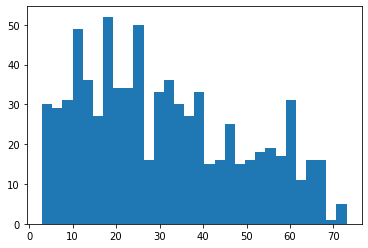

In [26]:
true_shift= all_dfs[all_dfs['games']>5]
goalie_shift = true_shift[true_shift['position']=='Goalie']
plt.hist(goalie_shift['games_started'],bins=30);

In [27]:
def goalie_usage_rating(row):
    if row['games_started'] <= 10:
        val = 3
    elif row['games_started'] <= 20:
        val = 4
    elif row['games_started'] <= 30 :
        val = 5
    elif row['games_started'] <= 40 :
        val = 6
    elif row['games_started'] <= 40 :
        val = 7
    elif row['games_started'] <= 55 :
        val = 8
    elif row['games_started'] <= 60:
        val = 9
    elif row['games_started'] >=61:
        val = 10
    else:
        val = 0
    return val

In [28]:
all_dfs['goalie_usage_rating'] = all_dfs[all_dfs['position']=='Goalie'].apply(goalie_usage_rating, axis=1)
all_dfs

,id,name,position,team,assists,games,games_started,goals,blocked,penaltymin,...,fwd_pass_rtg,def_pass_rtg,fwd_shift_usage_rtg,def_shift_usage_rtg,pim_per_game,blocked_shots_per_game,points_per_game,assists_per_game,goals_per_game,goalie_usage_rating
0,8460465,Petr Sykora,Forward,New Jersey Devils,23.0,82.0,0.0,21.0,16.0,40.0,...,6.0,NaN,8.0,NaN,0.487805,0.195122,0.536585,0.280488,0.256098,NaN
1,8460542,Patrik Elias,Forward,New Jersey Devils,52.0,81.0,0.0,26.0,26.0,16.0,...,10.0,NaN,10.0,NaN,0.197531,0.320988,0.962963,0.641975,0.320988,NaN
2,8460626,Bryce Salvador,Defenseman,New Jersey Devils,9.0,82.0,0.0,0.0,107.0,66.0,...,NaN,4.0,NaN,6.0,0.804878,1.304878,0.109756,0.109756,0.000000,NaN
3,8460720,Eric Boulton,Forward,New Jersey Devils,0.0,51.0,0.0,0.0,10.0,115.0,...,3.0,NaN,4.0,NaN,2.254902,0.196078,0.000000,0.000000,0.000000,NaN
4,8464977,Dainius Zubrus,Forward,New Jersey Devils,27.0,82.0,0.0,17.0,41.0,34.0,...,7.0,NaN,10.0,NaN,0.414634,0.500000,0.536585,0.329268,0.207317,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10550,8481522,Peyton Krebs,Forward,Vegas Golden Knights,1.0,4.0,0.0,0.0,1.0,0.0,...,3.0,NaN,6.0,NaN,0.000000,0.250000,0.250000,0.250000,0.000000,NaN
10551,8470594,Marc-Andre Fleury,Goalie,Vegas Golden Knights,0.0,36.0,36.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,6.0
10552,8475215,Robin Lehner,Goalie,Vegas Golden Knights,0.0,19.0,19.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
10553,8476861,Oscar Dansk,Goalie,Vegas Golden Knights,0.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,3.0


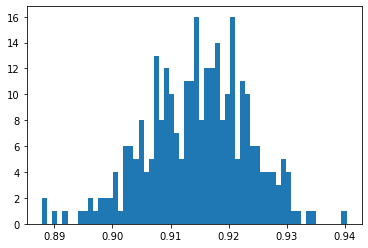

In [29]:
all_sp = all_dfs[all_dfs['games_started']>=35]
goalie_sp= all_sp[all_sp['position']=='Goalie']
plt.hist(goalie_sp['save_percentage'],bins=60);

In [30]:
def goalie_save_rating(row):
    if row['save_percentage'] <= .895:
        val = 3
    elif row['save_percentage'] <= .900:
        val = 4
    elif row['save_percentage'] <= .905 :
        val = 5
    elif row['save_percentage'] <= .910 :
        val = 6
    elif row['save_percentage'] <= .915 :
        val = 7
    elif row['save_percentage'] <= .920:
        val = 8
    elif row['save_percentage'] <= .925:
        val = 9
    elif row['save_percentage'] >= .92501:
        val = 10
    else:
        val = 0
    return val

In [31]:
all_dfs['goalie_save_rating'] = all_dfs[all_dfs['position']=='Goalie'].apply(goalie_save_rating, axis=1)
all_dfs

,id,name,position,team,assists,games,games_started,goals,blocked,penaltymin,...,def_pass_rtg,fwd_shift_usage_rtg,def_shift_usage_rtg,pim_per_game,blocked_shots_per_game,points_per_game,assists_per_game,goals_per_game,goalie_usage_rating,goalie_save_rating
0,8460465,Petr Sykora,Forward,New Jersey Devils,23.0,82.0,0.0,21.0,16.0,40.0,...,NaN,8.0,NaN,0.487805,0.195122,0.536585,0.280488,0.256098,NaN,NaN
1,8460542,Patrik Elias,Forward,New Jersey Devils,52.0,81.0,0.0,26.0,26.0,16.0,...,NaN,10.0,NaN,0.197531,0.320988,0.962963,0.641975,0.320988,NaN,NaN
2,8460626,Bryce Salvador,Defenseman,New Jersey Devils,9.0,82.0,0.0,0.0,107.0,66.0,...,4.0,NaN,6.0,0.804878,1.304878,0.109756,0.109756,0.000000,NaN,NaN
3,8460720,Eric Boulton,Forward,New Jersey Devils,0.0,51.0,0.0,0.0,10.0,115.0,...,NaN,4.0,NaN,2.254902,0.196078,0.000000,0.000000,0.000000,NaN,NaN
4,8464977,Dainius Zubrus,Forward,New Jersey Devils,27.0,82.0,0.0,17.0,41.0,34.0,...,NaN,10.0,NaN,0.414634,0.500000,0.536585,0.329268,0.207317,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10550,8481522,Peyton Krebs,Forward,Vegas Golden Knights,1.0,4.0,0.0,0.0,1.0,0.0,...,NaN,6.0,NaN,0.000000,0.250000,0.250000,0.250000,0.000000,NaN,NaN
10551,8470594,Marc-Andre Fleury,Goalie,Vegas Golden Knights,0.0,36.0,36.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,6.0,10.0
10552,8475215,Robin Lehner,Goalie,Vegas Golden Knights,0.0,19.0,19.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,7.0
10553,8476861,Oscar Dansk,Goalie,Vegas Golden Knights,0.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,3.0


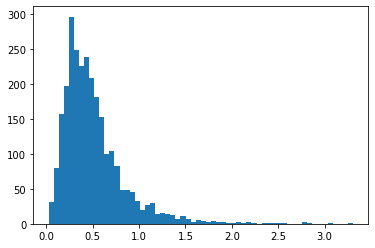

In [32]:
all_pim = all_dfs[all_dfs['games']>=70]
pim_ng= all_pim[~(all_pim['position']=='Goalie')]
plt.hist(pim_ng['pim_per_game'],bins=60);

In [33]:
def penalty_liability(row):
    if row['pim_per_game'] <= .25:   
        val = 3
    elif row['pim_per_game'] <= .45:
        val = 4
    elif row['pim_per_game'] <= .65 :
        val = 5
    elif row['pim_per_game'] <= .85 :
        val = 6
    elif row['pim_per_game'] <= 1 :
        val = 7
    elif row['pim_per_game'] <= 1.25:
        val = 8
    elif row['pim_per_game'] <= 1.50:
        val = 9
    elif row['pim_per_game'] >= 1.5001:
        val = 10
    else:
        val = 0
    return val

In [34]:
all_dfs['penalty_liability_rtg'] = all_dfs[~(all_dfs['position']=='Goalie')].apply(penalty_liability, axis=1)
all_dfs

,id,name,position,team,assists,games,games_started,goals,blocked,penaltymin,...,fwd_shift_usage_rtg,def_shift_usage_rtg,pim_per_game,blocked_shots_per_game,points_per_game,assists_per_game,goals_per_game,goalie_usage_rating,goalie_save_rating,penalty_liability_rtg
0,8460465,Petr Sykora,Forward,New Jersey Devils,23.0,82.0,0.0,21.0,16.0,40.0,...,8.0,NaN,0.487805,0.195122,0.536585,0.280488,0.256098,NaN,NaN,5.0
1,8460542,Patrik Elias,Forward,New Jersey Devils,52.0,81.0,0.0,26.0,26.0,16.0,...,10.0,NaN,0.197531,0.320988,0.962963,0.641975,0.320988,NaN,NaN,3.0
2,8460626,Bryce Salvador,Defenseman,New Jersey Devils,9.0,82.0,0.0,0.0,107.0,66.0,...,NaN,6.0,0.804878,1.304878,0.109756,0.109756,0.000000,NaN,NaN,6.0
3,8460720,Eric Boulton,Forward,New Jersey Devils,0.0,51.0,0.0,0.0,10.0,115.0,...,4.0,NaN,2.254902,0.196078,0.000000,0.000000,0.000000,NaN,NaN,10.0
4,8464977,Dainius Zubrus,Forward,New Jersey Devils,27.0,82.0,0.0,17.0,41.0,34.0,...,10.0,NaN,0.414634,0.500000,0.536585,0.329268,0.207317,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10550,8481522,Peyton Krebs,Forward,Vegas Golden Knights,1.0,4.0,0.0,0.0,1.0,0.0,...,6.0,NaN,0.000000,0.250000,0.250000,0.250000,0.000000,NaN,NaN,3.0
10551,8470594,Marc-Andre Fleury,Goalie,Vegas Golden Knights,0.0,36.0,36.0,0.0,0.0,0.0,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,6.0,10.0,NaN
10552,8475215,Robin Lehner,Goalie,Vegas Golden Knights,0.0,19.0,19.0,0.0,0.0,0.0,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,7.0,NaN
10553,8476861,Oscar Dansk,Goalie,Vegas Golden Knights,0.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,3.0,NaN


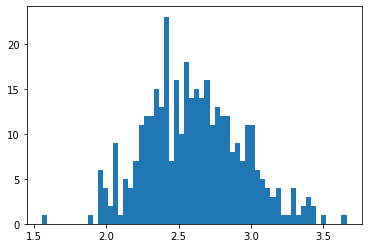

In [35]:
all_gaa = all_dfs[all_dfs['games_started']>=30]
goalie_gaa= all_gaa[all_gaa['position']=='Goalie']
plt.hist(goalie_gaa['gaa'],bins=60);

In [36]:
def goalie_gaa_rtg(row):
    if row['gaa'] <= 2.0:
        val = 10
    elif row['gaa'] <= 2.2 :
        val = 9
    elif row['gaa'] <= 2.4 :
        val = 8
    elif row['gaa'] <= 2.6 :
        val = 7
    elif row['gaa'] <= 2.8:
        val = 6
    elif row['gaa'] <= 3.0 :
        val = 5
    elif row['gaa'] <= 3.2 :
        val = 4
    elif row['gaa'] >= 3.201 :
        val = 3
    else:
        val = 0
    return val

In [37]:
all_dfs['goalie_gaa_rtg'] = all_dfs[all_dfs['position']=='Goalie'].apply(goalie_gaa_rtg, axis=1)
all_dfs

,id,name,position,team,assists,games,games_started,goals,blocked,penaltymin,...,def_shift_usage_rtg,pim_per_game,blocked_shots_per_game,points_per_game,assists_per_game,goals_per_game,goalie_usage_rating,goalie_save_rating,penalty_liability_rtg,goalie_gaa_rtg
0,8460465,Petr Sykora,Forward,New Jersey Devils,23.0,82.0,0.0,21.0,16.0,40.0,...,NaN,0.487805,0.195122,0.536585,0.280488,0.256098,NaN,NaN,5.0,NaN
1,8460542,Patrik Elias,Forward,New Jersey Devils,52.0,81.0,0.0,26.0,26.0,16.0,...,NaN,0.197531,0.320988,0.962963,0.641975,0.320988,NaN,NaN,3.0,NaN
2,8460626,Bryce Salvador,Defenseman,New Jersey Devils,9.0,82.0,0.0,0.0,107.0,66.0,...,6.0,0.804878,1.304878,0.109756,0.109756,0.000000,NaN,NaN,6.0,NaN
3,8460720,Eric Boulton,Forward,New Jersey Devils,0.0,51.0,0.0,0.0,10.0,115.0,...,NaN,2.254902,0.196078,0.000000,0.000000,0.000000,NaN,NaN,10.0,NaN
4,8464977,Dainius Zubrus,Forward,New Jersey Devils,27.0,82.0,0.0,17.0,41.0,34.0,...,NaN,0.414634,0.500000,0.536585,0.329268,0.207317,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10550,8481522,Peyton Krebs,Forward,Vegas Golden Knights,1.0,4.0,0.0,0.0,1.0,0.0,...,NaN,0.000000,0.250000,0.250000,0.250000,0.000000,NaN,NaN,3.0,NaN
10551,8470594,Marc-Andre Fleury,Goalie,Vegas Golden Knights,0.0,36.0,36.0,0.0,0.0,0.0,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,6.0,10.0,NaN,10.0
10552,8475215,Robin Lehner,Goalie,Vegas Golden Knights,0.0,19.0,19.0,0.0,0.0,0.0,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,7.0,NaN,8.0
10553,8476861,Oscar Dansk,Goalie,Vegas Golden Knights,0.0,1.0,1.0,0.0,0.0,0.0,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,3.0,NaN,3.0


In [38]:
def availability_rating(row):
    if row['games'] <= 10:
        val = 3
    elif row['games'] <= 20:
        val = 4
    elif row['games'] <= 30 :
        val = 5
    elif row['games'] <= 40 :
        val = 6
    elif row['games'] <= 50 :
        val = 7
    elif row['games'] <= 60:
        val = 8
    elif row['games'] <= 70:
        val = 9
    elif row['games'] >=71:
        val = 10
    else:
        val = 0
    return val

In [39]:
all_dfs['availability_rtg'] = all_dfs[~(all_dfs['position']=='Goalie')].apply(availability_rating, axis=1)
all_dfs

,id,name,position,team,assists,games,games_started,goals,blocked,penaltymin,...,pim_per_game,blocked_shots_per_game,points_per_game,assists_per_game,goals_per_game,goalie_usage_rating,goalie_save_rating,penalty_liability_rtg,goalie_gaa_rtg,availability_rtg
0,8460465,Petr Sykora,Forward,New Jersey Devils,23.0,82.0,0.0,21.0,16.0,40.0,...,0.487805,0.195122,0.536585,0.280488,0.256098,NaN,NaN,5.0,NaN,10.0
1,8460542,Patrik Elias,Forward,New Jersey Devils,52.0,81.0,0.0,26.0,26.0,16.0,...,0.197531,0.320988,0.962963,0.641975,0.320988,NaN,NaN,3.0,NaN,10.0
2,8460626,Bryce Salvador,Defenseman,New Jersey Devils,9.0,82.0,0.0,0.0,107.0,66.0,...,0.804878,1.304878,0.109756,0.109756,0.000000,NaN,NaN,6.0,NaN,10.0
3,8460720,Eric Boulton,Forward,New Jersey Devils,0.0,51.0,0.0,0.0,10.0,115.0,...,2.254902,0.196078,0.000000,0.000000,0.000000,NaN,NaN,10.0,NaN,8.0
4,8464977,Dainius Zubrus,Forward,New Jersey Devils,27.0,82.0,0.0,17.0,41.0,34.0,...,0.414634,0.500000,0.536585,0.329268,0.207317,NaN,NaN,4.0,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10550,8481522,Peyton Krebs,Forward,Vegas Golden Knights,1.0,4.0,0.0,0.0,1.0,0.0,...,0.000000,0.250000,0.250000,0.250000,0.000000,NaN,NaN,3.0,NaN,3.0
10551,8470594,Marc-Andre Fleury,Goalie,Vegas Golden Knights,0.0,36.0,36.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.0,10.0,NaN,10.0,NaN
10552,8475215,Robin Lehner,Goalie,Vegas Golden Knights,0.0,19.0,19.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,7.0,NaN,8.0,NaN
10553,8476861,Oscar Dansk,Goalie,Vegas Golden Knights,0.0,1.0,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,3.0,NaN,3.0,NaN


In [40]:
all_dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10555 entries, 0 to 10554
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10555 non-null  int64  
 1   name                    10555 non-null  object 
 2   position                10555 non-null  object 
 3   team                    10555 non-null  object 
 4   assists                 10551 non-null  float64
 5   games                   10551 non-null  float64
 6   games_started           10551 non-null  float64
 7   goals                   10551 non-null  float64
 8   blocked                 10551 non-null  float64
 9   penaltymin              10551 non-null  float64
 10  plusMinus               10551 non-null  float64
 11  wins                    10551 non-null  float64
 12  losses                  10551 non-null  float64
 13  gaa                     10551 non-null  float64
 14  shots_against           10551 non-null

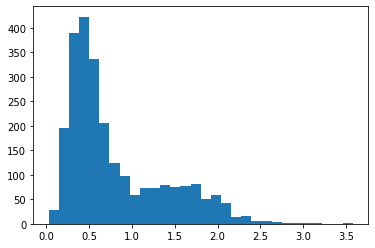

In [41]:
true_block = all_dfs[all_dfs['games']>70]
player_block= true_block[~(true_block['position'] == 'Goalie')]
plt.hist(player_block['blocked_shots_per_game'],bins=30);

In [42]:
def defense_blocks_rating(row):
    if row['blocked_shots_per_game'] <= 0.25 :
        val = 3
    elif row['blocked_shots_per_game'] <= 0.40 :
        val = 4
    elif row['blocked_shots_per_game'] <= 0.55 :
        val = 5
    elif row['blocked_shots_per_game'] <= 0.70 :
        val = 6
    elif row['blocked_shots_per_game'] <= 0.85 :
        val = 7
    elif row['blocked_shots_per_game'] <= 1 :
        val = 8
    elif row['blocked_shots_per_game'] <= 1.15 :
        val = 9
    elif row['blocked_shots_per_game'] >=1.1501 :
        val = 10
    else:
        val = 0
    return val

In [43]:
all_dfs['def_block_rtg'] = all_dfs[~(all_dfs['position'] == 'Goalie')].apply(defense_blocks_rating, axis=1)
all_dfs

,id,name,position,team,assists,games,games_started,goals,blocked,penaltymin,...,blocked_shots_per_game,points_per_game,assists_per_game,goals_per_game,goalie_usage_rating,goalie_save_rating,penalty_liability_rtg,goalie_gaa_rtg,availability_rtg,def_block_rtg
0,8460465,Petr Sykora,Forward,New Jersey Devils,23.0,82.0,0.0,21.0,16.0,40.0,...,0.195122,0.536585,0.280488,0.256098,NaN,NaN,5.0,NaN,10.0,3.0
1,8460542,Patrik Elias,Forward,New Jersey Devils,52.0,81.0,0.0,26.0,26.0,16.0,...,0.320988,0.962963,0.641975,0.320988,NaN,NaN,3.0,NaN,10.0,4.0
2,8460626,Bryce Salvador,Defenseman,New Jersey Devils,9.0,82.0,0.0,0.0,107.0,66.0,...,1.304878,0.109756,0.109756,0.000000,NaN,NaN,6.0,NaN,10.0,10.0
3,8460720,Eric Boulton,Forward,New Jersey Devils,0.0,51.0,0.0,0.0,10.0,115.0,...,0.196078,0.000000,0.000000,0.000000,NaN,NaN,10.0,NaN,8.0,3.0
4,8464977,Dainius Zubrus,Forward,New Jersey Devils,27.0,82.0,0.0,17.0,41.0,34.0,...,0.500000,0.536585,0.329268,0.207317,NaN,NaN,4.0,NaN,10.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10550,8481522,Peyton Krebs,Forward,Vegas Golden Knights,1.0,4.0,0.0,0.0,1.0,0.0,...,0.250000,0.250000,0.250000,0.000000,NaN,NaN,3.0,NaN,3.0,3.0
10551,8470594,Marc-Andre Fleury,Goalie,Vegas Golden Knights,0.0,36.0,36.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,6.0,10.0,NaN,10.0,NaN,NaN
10552,8475215,Robin Lehner,Goalie,Vegas Golden Knights,0.0,19.0,19.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,4.0,7.0,NaN,8.0,NaN,NaN
10553,8476861,Oscar Dansk,Goalie,Vegas Golden Knights,0.0,1.0,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,3.0,3.0,NaN,3.0,NaN,NaN


In [44]:
#reindexing columns for an easier analysis 
all_dfs = all_dfs.reindex(columns=['yearid','team','id','name','position','games','time_on_ice','games_started', 'goals','goals_per_game','assists','points','points_per_game','plusMinus','blocked','blocked_shots_per_game','penaltymin','pim_per_game','wins','losses','shutouts','goals_against','gaa','shots_against','saves','save_percentage','fwd_scoring_rtg','def_scoring_rtg','fwd_pass_rtg','def_pass_rtg', 'def_block_rtg','fwd_shift_usage_rtg','def_shift_usage_rtg','availability_rtg','penalty_liability_rtg','goalie_usage_rating','goalie_save_rating','goalie_gaa_rtg'])
all_dfs

,yearid,team,id,name,position,games,time_on_ice,games_started,goals,goals_per_game,...,fwd_pass_rtg,def_pass_rtg,def_block_rtg,fwd_shift_usage_rtg,def_shift_usage_rtg,availability_rtg,penalty_liability_rtg,goalie_usage_rating,goalie_save_rating,goalie_gaa_rtg
0,2011-2012,New Jersey Devils,8460465,Petr Sykora,Forward,82.0,15.900000,0.0,21.0,0.256098,...,6.0,NaN,3.0,8.0,NaN,10.0,5.0,NaN,NaN,NaN
1,2011-2012,New Jersey Devils,8460542,Patrik Elias,Forward,81.0,19.850000,0.0,26.0,0.320988,...,10.0,NaN,4.0,10.0,NaN,10.0,3.0,NaN,NaN,NaN
2,2011-2012,New Jersey Devils,8460626,Bryce Salvador,Defenseman,82.0,20.200000,0.0,0.0,0.000000,...,NaN,4.0,10.0,NaN,6.0,10.0,6.0,NaN,NaN,NaN
3,2011-2012,New Jersey Devils,8460720,Eric Boulton,Forward,51.0,6.583333,0.0,0.0,0.000000,...,3.0,NaN,3.0,4.0,NaN,8.0,10.0,NaN,NaN,NaN
4,2011-2012,New Jersey Devils,8464977,Dainius Zubrus,Forward,82.0,18.683333,0.0,17.0,0.207317,...,7.0,NaN,5.0,10.0,NaN,10.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10550,2020-2021,Vegas Golden Knights,8481522,Peyton Krebs,Forward,4.0,11.433333,0.0,0.0,0.000000,...,3.0,NaN,3.0,6.0,NaN,3.0,3.0,NaN,NaN,NaN
10551,2020-2021,Vegas Golden Knights,8470594,Marc-Andre Fleury,Goalie,36.0,59.616667,36.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,10.0,10.0
10552,2020-2021,Vegas Golden Knights,8475215,Robin Lehner,Goalie,19.0,60.800000,19.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,7.0,8.0
10553,2020-2021,Vegas Golden Knights,8476861,Oscar Dansk,Goalie,1.0,61.416667,1.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0


In [45]:
all_dfs.to_csv('../Data/stats_with_grades.csv')